Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Linear Regression - Exercise 1

Câu trả lời trong các câu hỏi là những gì em đọc hiểu từ slide và các thông tin trên mạng, nếu có sai xót gì em mong Thầy, Cô và các bạn TA chỉnh sửa giúp em, em xin cảm ơn ạ.

##  Đọc hiểu code (file Lesson D3 - One Sample _ Implementation (Naive).ipynb và Lesson D4 - One Sample _ Implementation (Vectorization) về cách train bài toán linear regression theo cách thông thường và vectorization.

**Lesson D3 - One Sample _ Implementation (Naive).ipynb**

**- Tổng quan:** đây là phần code thực hiện linear regression theo cách thông thường và đơn giản nhất không quan tâm đến tốc độ xử lý vì sử dụng các vòng lặp.

**- Ưu điểm**: đơn giản, dễ thực hiện.

**- Khuyết điểm:** tốc độ xử lý chậm vì dùng nhiều vòng lặp. 

Theo yêu cầu của đề bài thì input là **areas** (diện tích nhà) và output dự đoán **prices** (giá nhà).

Đầu tiên là việc load và quan sát data, 2 thư viện cần dùng là **numpy** dùng xử lý chuyển đổi kiểu dữ liệu, và **matplotlib** dùng để visualize data. Numpy hỗ trợ load data theo kiểu có 2 cột: areas và prices, sau đó sẽ plot các điểm (scatter mode)trong data đê quan sát.

**Note:** sử dụng '%matplotlib inline' để vẽ được hình trong 1 cell trên jupyter notebook

**=> Từ hình vẽ quan sát được diện tích càng tăng thì giá nhà sẽ càng tăng, đây có thể là mối quan hệ tuyến tính nên có thể dùng linear regression để predict được.**  


areas:  [6.7, 4.6, 3.5, 5.5]
prices:  [9.1, 5.9, 4.6, 6.7]
data_size:  4


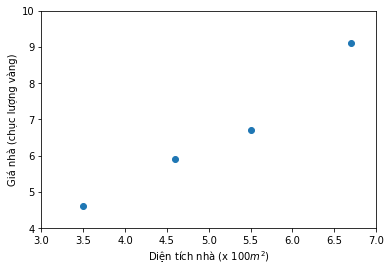

In [5]:
# Naive implementaion

# load data
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline 

data = genfromtxt('data.csv', delimiter=',')
areas  = list(data[:,0])
prices = list(data[:,1])
data_size = len(areas)

print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

Để xây dựng một supervise learning model nói chung và linear regression model nói riêng thì cầ n 3 functions chính: **forward, backward, update weights**

**- Forward:** (function predict trong code ): nhận input và dự đoán ouptput theo yêu cầu nhất định dựa trên các features. Vì đây là linear regression nên equation cho predict sẽ là $y= x*w + b$, trong đó **y** là kế quả dự đoán, **x** là input (các features hiện tại chỉ sử dụng 1 feature là area)  **w** là weight các tham số  giúp dự đoán, **b** cũng là tham số  dự đoán và có nhiệm vụ giúp mô hình dự đoán có thể shift được trên trục x thay vì chỉ đi qua trục tọa độ. **w và b** là 2 tham số  cần được học, trong khi **x, y** là có từ data. function này nhân in put là **x,w,b** và return **y**.

**- Backward:** (function gradient trong code): dùng output vừa tính được so sánh sai số với kết quả thực từ input đó để tính đạo hàm để biết được hướng cần điều chỉnh bộ weights cho lần predict tiếp theo được chính xác hơn. Function này dùng để lấy kết quả đạo hàm theo **w** và **b** của hàm loss được tính theo $L = (predicted\_output - real\_output)^2$

**- Update Weights:** (function update_weight trong code) cập nhật bộ weights mới theo learning_rate **n**

In [7]:
# forward
def predict(x,w,b):
    return x*w + b

# compute gradient
def gradient(z,y,x):
    dw = 2*x*(z-y)
    db = 2*(z-y)
    
    return (dw, db)

# update weights
def update_weight(w,b,n,dw,db):
    w_new = w - n*dw
    b_new = b - n*db
    
    return (w_new, b_new)

Tiếp theo là các step cần thực hiện để train 1 linear regression model

- Xác định các giá trị khởi tạo cho parameter *b*, *w* và hyperparemeter *n*.

- Xác định số lần train hết 1 tập dữ liệu 'epoch_max'.

- Load từng sample lên để giúp model học (thông thường sẽ load theo 3 dạng batch, minibatch và stochastic gradient descent) hiện tại code chỉ load 1 lần để hiển thị kết quả.

    + Hàm predict được dùng để dự đoán kết quả giá nhà dựa trên diện tích nhà và bộ tham số khởi tạo đầu tiên.
    + Tiếp theo tính loss của giá nhà dự đoán và giá nhà thưc của data bằng 1 hàm loss như đã giới thiệu ở trên.
    + Tính gradient.
    + Cấp nhật bộ tham số để lần dự đoán tiếp theo có thể tốt hơn.
- Nếu vẫn chưa đạt được yêu cầu của số lần epoch thì lặp lại.


In [8]:
# init weights
b = 0.04
w = -0.34
n = 0.01

# how long
epoch_max = 1

for epoch in range(epoch_max):
    for i in range(1):
        # get a sample
        x = areas[i]
        y = prices[i]
        print('sample: ', x, y)
        
        # predict z
        z = predict(x,w,b)
        print('z: ', z)

        # compute loss
        loss = (z-y)*(z-y)
        print('Loss: ', loss)

        # compute gradient
        (dw, db) = gradient(z,y,x)
        print('dw: ', dw)
        print('db: ', db)

        # update weights
        (w, b) = update_weight(w,b,n,dw,db)
        print('w_new: ', w)
        print('b_new: ', b)
        print('\n\n')

sample:  6.7 9.1
z:  -2.238
Loss:  128.550244
dw:  -151.92919999999998
db:  -22.676
w_new:  1.1792919999999998
b_new:  0.26676





**Lesson D4 - One Sample _ Implementation (Vectorization)**

Nếu thực hiện cách ở trên sẽ có vấn đề xảy ra là nếu như input lớn hơn 1 feature hoặc cần train 1 lúc n sample thì bắt buộc phải sử dụng thêm các vòng lập. Từ đó vectorization implementation được ra đời để hỗ trợ giúp việc tính toán nhanh hơn, phần lớn các phép tính toán đều được tính theo công thức ma trận để loại bỏ các vòng lặp.

- Cách thức load data không thay đổi nhưng các tính toán trong 3 function chính đã được chuyển thành cách tính theo ma trận với sự hỗ trợ của thư viện numpy.
- Ví dụ như hàm gradient và update_weight chỉ cần 1 phép tính thay vì 2 như cách naive
- Cách thức data được đưa vào cũng được thay đổi, input x được mở rổng với constant = 1, vì theo công thức predict weight không nhân với b.


In [9]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# forward
def predict(x,theta):
    return x.dot(theta)

# compute gradient
def gradient(z,y,x):
    dtheta = 2*x*(z-y)
    
    return dtheta

# update weights
def update_weight(theta,n,dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

# init weight
n = 0.01
theta = np.array([-0.34, 0.04]) #[w, b]

# how long
epoch_max = 10

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(data_size):
        # get a sample
        x = data[i]
        y = prices[i:i+1]

        # predict z
        z = predict(x, theta)

        # compute loss
        loss = (z-y)*(z-y)
        losses.append(loss[0])

        # compute gradient
        dtheta = gradient(z,y,x)

        # update weights
        theta = update_weight(theta,n,dtheta)

## Trong phần xây dựng công thức, chúng ta tính loss $L = (output − label)^2$. Các bạn hãy xây dựng công thức cho bài toán linear regression với cách tính loss $L = (label − output)^2$

- Tính output $o^{(i)}$ 
$$o^{(i)} = \pmb{\theta^Tx}$$
- Tính loss $$L = (y^{(i)} - o^{(i)})^2 $$
- Tính đạo hàm $$\pmb{L^{'(i)}_\theta} = -2\pmb{x}(y^{(i)} - o^{(i)})$$
- Cập nhật tham số $$\pmb{\theta} = \pmb{\theta} - \eta \frac{\pmb{\sum(L^{'(i)}_\theta})}{m}$$

## Trong cách cài đặt vectorization, vector tham số theta=[w,b]. Các bạn hãy chỉnh lại code với cách chọn theta=[b,w].

In [42]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size
# forward
def predict(x,theta):
    return x.dot(theta)

# compute gradient
def gradient(z,y,x):
    dtheta = 2*x*(z-y)
    
    return dtheta

# update weights
def update_weight(theta,n,dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

# # vector [x, b]
# data = np.c_[areas, np.ones((data_size, 1))]
# vector [b, x]
data = np.c_[np.ones((data_size, 1)), areas]

# init weight
n = 0.01
# theta = np.array([-0.34, 0.04]) #[w, b]
theta = np.array([0.04, -0.34]) #[b, w]

# how long
epoch_max = 1000

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(data_size):
        # get a sample
        x = data[i]
        y = prices[i:i+1]

        # predict z
        z = predict(x, theta)

        # compute loss
        loss = (z-y)*(z-y)
        losses.append(loss[0])

        # compute gradient
        dtheta = gradient(z,y,x)

        # update weights
        theta = update_weight(theta,n,dtheta)
        

## Cài đặt linear regression cho bài toán advertising theo 2 cách (cách thông thườngvà vectorization) dùng 1 sample (stochastic gradient descent). Data advertising:https://www.dropbox.com/s/ve57nlqwikgjzrh/advertising.csv?dl=0

**Cách Thông Thường**

In [16]:

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',')
tv = list(data[1:,0])
rad = list(data[1:,1])
news = list(data[1:,2])
sales  = list(data[1:,3])

# forward
def forward(x,w,b):
    return sum([x_n*w_n for x_n, w_n in zip(x,w)]) + b

# compute gradient
def gradient(x, b, o, y):
    sb = 2*(o-y)
    dw = [x_n*sb for x_n in x]
    db = sb
    return dw, db

# update weights
def update_weights(w, b, eta, dw, db):
    new_w = [w_n - eta*dw_n for w_n, dw_n in zip(w,dw)]
    new_b = b - eta*db
    return new_w, new_b

# init weight
w1 = 0.01
w2 = 0.02
w3 = 0.03
b = 0.02
eta = 0.00001
w = [w1, w2, w3]

# how long
epochs = 1
losses = [] # for debug
for epoch in range(epochs):
    for i in range(len(tv)):
        # get sample
        x = [tv[i], rad[i], news[i]]
        y = sales[i]
        
        # predict
        pred = forward(x, w, b)
        
        #Compute loss
        l = (pred-y)**2
        losses.append(l)
        
        #Compute gradient
        dw, db = gradient(x, b, pred, y)
        #Update weights
        w, b = update_weights(w, b, eta, dw, db)
print(w, b)
print(sales[1])
print(forward([tv[1], rad[1], news[1]], w, b))

[0.075552783783497, 0.10998665506373026, 0.044257857324586536] 0.02386557548605707
10.4
9.704469363195125


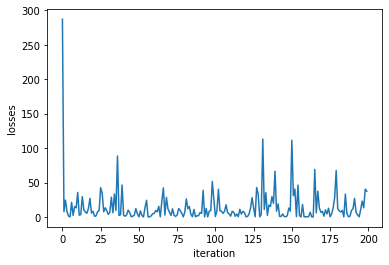

In [17]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

**vectorization**

In [33]:

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',')
tv = list(data[1:,0])
rad = list(data[1:,1])
news = list(data[1:,2])
sales  = list(data[1:,3])
data_size = len(tv)
# forward
def forward(x,theta):
    return x.dot(theta)

# compute gradient
def gradient(x, o, y):
    return 2*x*(o-y)

# update weights
def update_weights(theta,eta, dtheta):
    return theta - eta*dtheta

# init weight
w1 = 0.01
w2 = 0.02
w3 = 0.03
b = 0.02
eta = 0.00001
theta = np.array([w1, w2, w3, b])

# vecotrize input
data = np.c_[tv, rad, news, np.ones((data_size, 1))]
# how long
epochs = 10000
losses = [] # for debug
for epoch in range(epochs):
    for i in range(data_size):
        # get sample
        x = data[i]
        y = sales[i:i+1]
        
        # predict
        pred = forward(x, theta)
        
        #Compute loss
        l = (pred-y)**2
        losses.append(l)
        
        #Compute gradient
        dtheta = gradient(x, pred, y)
        #Update weights
        theta = update_weights(theta, eta, dtheta)
print(theta, b)
print(sales[1])
print(forward( data[i], theta))

[ 0.05454134  0.10886936 -0.00506731  4.75989375] 0.02
10.4
18.311130257838435


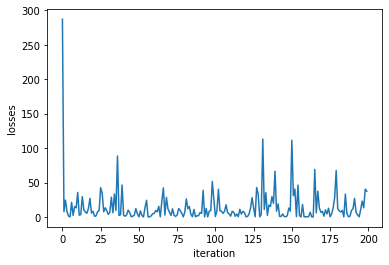

In [32]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

## Accuracy có dùng làm hàm loss được không? Tại sao?

Theo em thì accuracy không được dùng làm hàm loss vì hàm loss mục đích chính là tính điểm sai xót giữa kết quả dự đoán và output thưc, trong khi hàm accuracy dùng để đo kết quả này chính xác hay không và chính xác bao nhiêu. Mục đích dùng hàm loss là để tìm được đạo hàm và đi ngược hướng đạo hàm để giảm thiểu sai xót.

## Xây dựng hàm linear regression với cách tính loss $L = |output − label|$.

- Tính output $o^{(i)}$ 
$$o^{(i)} = \pmb{\theta^Tx}$$
- Tính loss $$L = |o^{(i)} - y^{(i)}| $$
- Tính đạo hàm $$\pmb{L^{'(i)}_\theta} = \begin{cases}
  +1,\quad o>y\\
  -1,\quad o<y
\end{cases}$$
- Cập nhật tham số $$\pmb{\theta} = \pmb{\theta} - \eta \frac{\pmb{\sum(L^{'(i)}_\theta})}{m}$$
